# Get data from Eurostat

**Explanation:** the necessity to create model which extract and model data from Eurostat is because the API offered by the website let just to read default tables and not custom. For example if you need to customize some tables changing whole number as percentage you can not directly read the code customized for your changes. So, the following code will let you read any codes.

**Disclaimer:** backend model is not visible at the moment. Just calling the udf and see how it works

**Example highlighted about custom code**
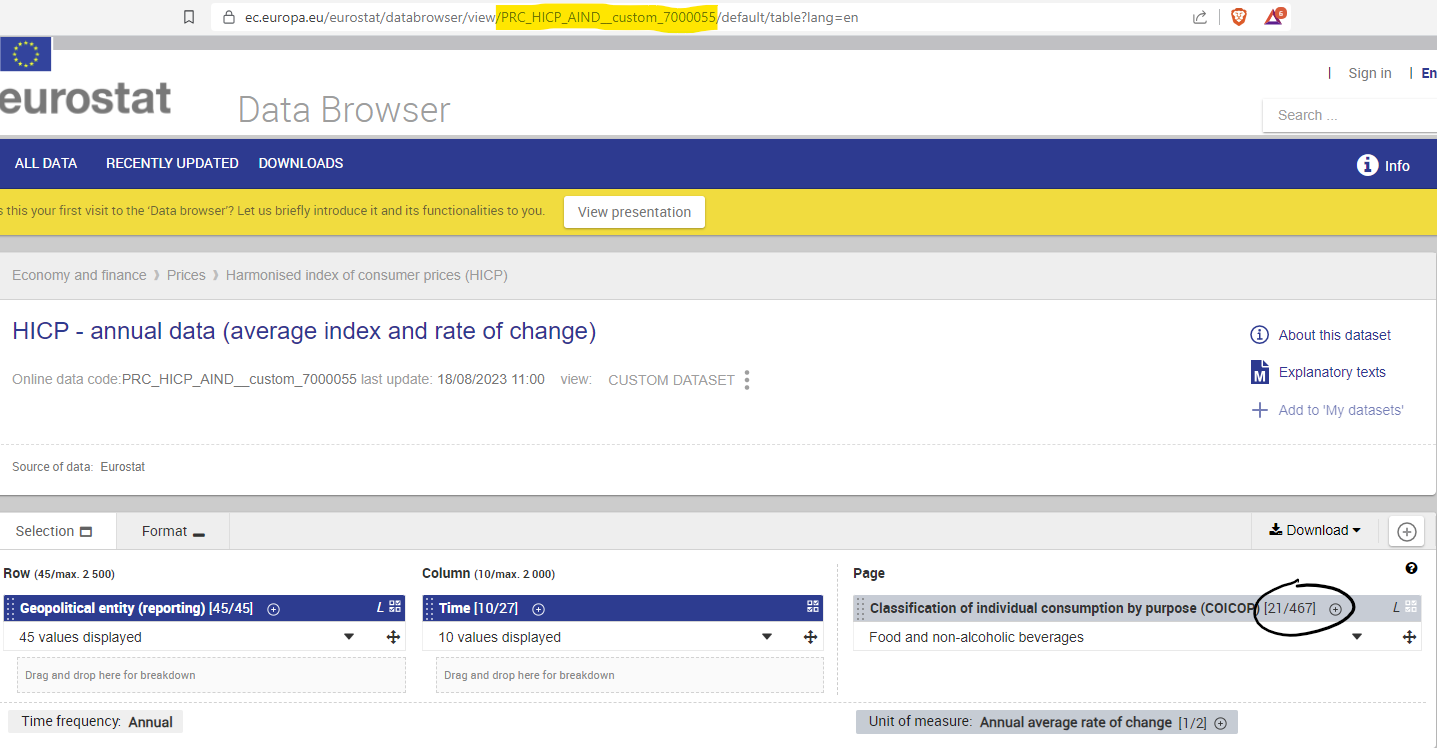

## SetUp

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import requests
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
# IMPORT FILE: country_codes
import country_codes
from country_codes import eurostat_dictionary # it contains dictionary with country abbreviation and name of country
len(eurostat_dictionary)

75

In [3]:
import sys
sys.path.append('---PATH---')
import macro_udf

In [4]:
# VISUALIZE TABLE: ',None'
# VISUALIZE JUST SUBSET: remove ',None'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# General Overview

**INFO COUNTRIES** [**Source EU and European Economic Area (EEA)**](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes)

In [5]:
# table with countries and eu reference to check
info_eu_efta_countries = macro_udf.generate_info_eu_efta_countries()

In [6]:
info_eu_efta_countries.head()

,country,list
0,Austria,eu_countries
1,Belgium,eu_countries
2,Bulgaria,eu_countries
3,Croatia,eu_countries
4,Cyprus,eu_countries


# Pipeline from data extraction to modelling

## <u>User filtering (5 steps)

**1.** Search by Eurostat website the tables you interested in (you can decide to customize them or not)

**2.** Define countries you want incude for research (EU and EEU in this case)

In [7]:
# Country will be selected from 'eurostat_dictionary' imported
EU_countries = ['Austria', 'Belgium','Bulgaria', 'Croatia',
                'Cyprus', 'Czechia', 'Denmark', 'Estonia',
                'Finland', 'France', 'Germany', 'Greece',
                'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
                'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
                'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
                # European Economic Area (EEA) / Liechtenstein doesn't have data
                'Iceland', 'Norway',
                # not an EU or EEA
                'Switzerland',
                # No EU
#                 'United Kingdom'
               ]

In [8]:
len(EU_countries)

30

**Check countries selected eu or not eu**

In [9]:
macro_udf.check_countries(EU_countries, info_eu_efta_countries)

You also selected extra eu countries (es. EFTA)
NOTE: these data could have missing or be not accurate. So, check them.


,no EU coutries
0,Iceland
1,Norway
2,Switzerland


**3.** Years setting

* make sure years you specified are available in the table you choose
* the code will choose just years in common for all table selected

In [10]:
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

**4.** paste custom or defoult code of table selected

In [11]:
custom_codes  = ['TPS00001', 'TPS00003','TEC00115','SDG_17_40','TEC00023','TET00002',
                 'TEC00112','DEMO_PJANIND__custom_6776614','EDAT_LFSE_03__custom_6767752',
                 'LC_LCI_R2_A__custom_6999771','PRC_HICP_AIND__custom_7000055']

In [12]:
len(custom_codes)

11

**5.** Map your codes with custom titles

In [13]:
# Map code with name reference need in dataframe
column_custom_mapping = {
    
    # Demographic
    'TPS00001': 'ToTPop.', # Demographic balance population total
    'TPS00003':'PopDens', # Persons per square kilometre
    
    # Macroeconomic
    'TEC00115':'RealGDPGRChg(%)', # Real GDP growth rate change by previous year
    'SDG_17_40':'GrDebtToGDP(%)', # Gross Debt to GDP
    'TEC00023':'GovExpToGDP(%)', # Government expenditure to GDP
    'TET00002':'IntTdGoods', # Net Trade goods (no EFTA)

    # Population
    'TEC00112':'EmpDomCon', # How many people country employ
    'DEMO_PJANIND__custom_6776614':'DepOnWorkP(%)', # Dependency on Working Population
    'EDAT_LFSE_03__custom_6767752':'EduLev3(5-8)(%)', # Tertiary education (levels 5-8)
    'LC_LCI_R2_A__custom_6999771':'InduCostChg(%)', # Labor industry cost change by previous year
    'PRC_HICP_AIND__custom_7000055':'HICPChg(%)' # Harmonizes Index Consumer Price (check basket selected)
}

# HICP BASKET: made by main point select indices that don't have high seasonal, high frequency changing. And indices
# that are referred like premium (eg. travel, entertainment)

## <u>Test single code

In [14]:
test_code = ['TEC00115']
name_index = 'RealGDPGRChg(%)'
third_col_name = 'TEST' # if name index is not passed
# Run cell below

In [15]:
df_test_code = macro_udf.test_single_df(test_code, years, eurostat_dictionary, EU_countries, name_index, third_col_name)

In [16]:
# ORDER BY COLUMNS: 'country' and 'year'
df_test_code = df_test_code.sort_values(by=["country", "year"], ascending=[True, True])

In [17]:
df_test_code.head()

,country,year,RealGDPGRChg(%)
19,Austria,2013,0.0
49,Austria,2014,0.7
79,Austria,2015,1.0
109,Austria,2016,2.0
139,Austria,2017,2.3


## <u>Data extraction for all codes

In [18]:
result_df_custom = macro_udf.update_dataframes(custom_codes, eurostat_dictionary, years, EU_countries, column_custom_mapping)

In [19]:
# ORDER BY COLUMNS: 'country' and 'year'
result_df_custom = result_df_custom.sort_values(by=["country", "year"], ascending=[True, True])

In [20]:
result_df_custom.head()

,country,year,ToTPop.,PopDens,RealGDPGRChg(%),GrDebtToGDP(%),GovExpToGDP(%),IntTdGoods,EmpDomCon,DepOnWorkP(%),EduLev3(5-8)(%),InduCostChg(%),HICPChg(%)
19,Austria,2013,8451860.0,102.9,0.0,81.3,51.6,-6115.3,4219.77,48.1,22.2,2.9,3.4
49,Austria,2014,8507786.0,103.7,0.7,84.0,52.4,-2828.7,4259.90,48.4,20.3,2.9,1.8
79,Austria,2015,8584926.0,104.9,1.0,84.9,51.1,-2942.4,4285.54,48.7,19.6,2.9,0.8
109,Austria,2016,8700471.0,106.0,2.0,82.8,50.1,-5102.1,4341.33,48.8,19.6,0.9,0.7
139,Austria,2017,8772865.0,106.8,2.3,78.5,49.3,-6819.9,4412.56,49.1,19.3,3.4,2.3


In [21]:
len(result_df_custom)

300

**Get geographic reference countries list**

In [22]:
# Get country geographical data
from country_codes import country_geo_dic
df_country_geo = pd.DataFrame(country_geo_dic).T
df_country_geo.index.name = None
df_country_geo.reset_index(inplace=True)
df_country_geo.rename(columns={'index': 'country'}, inplace=True)

In [23]:
df_country_geo.head()

,country,region,continent
0,Algeria,Northern Africa,Africa
1,Egypt,Northern Africa,Africa
2,Libya,Northern Africa,Africa
3,Morocco,Northern Africa,Africa
4,Sudan,Northern Africa,Africa


In [24]:
len(df_country_geo)

249

**Added goegraphic reference to countries in the table**

In [25]:
result_df_custom = result_df_custom.merge(df_country_geo[['country', 'region']], on='country', how='left')
result_df_custom.rename(columns={'region': 'geo'}, inplace=True)

In [26]:
# Move 'geo' to first column
cols = ['geo'] + [col for col in result_df_custom if col != 'geo']
result_df_custom = result_df_custom[cols]

## <u>Final Output

In [27]:
result_df_custom.head()

,geo,country,year,ToTPop.,PopDens,RealGDPGRChg(%),GrDebtToGDP(%),GovExpToGDP(%),IntTdGoods,EmpDomCon,DepOnWorkP(%),EduLev3(5-8)(%),InduCostChg(%),HICPChg(%)
0,Western Europe,Austria,2013,8451860.0,102.9,0.0,81.3,51.6,-6115.3,4219.77,48.1,22.2,2.9,3.4
1,Western Europe,Austria,2014,8507786.0,103.7,0.7,84.0,52.4,-2828.7,4259.90,48.4,20.3,2.9,1.8
2,Western Europe,Austria,2015,8584926.0,104.9,1.0,84.9,51.1,-2942.4,4285.54,48.7,19.6,2.9,0.8
3,Western Europe,Austria,2016,8700471.0,106.0,2.0,82.8,50.1,-5102.1,4341.33,48.8,19.6,0.9,0.7
4,Western Europe,Austria,2017,8772865.0,106.8,2.3,78.5,49.3,-6819.9,4412.56,49.1,19.3,3.4,2.3


In [28]:
len(result_df_custom)

300

# Missing values check

## <u>Step 1
### check MCAR, MAR, MNAR

In [29]:
macro_udf.nan_sum_up(result_df_custom)

Following check also if data:
- Missing completely at random (MCAR)
- Missing at random (MAR)
- Missing not at random (MNAR)

*Total data*: 3300
*Total NaN in dataframe*: 40
*Total Zero in dataframe*: 44
*Percentage of NaN values to total size*: 1.21%
*Percentage of Zero values to total size*: 1.33%
*Total NaN + Total Zero*: 2.55%

*Column: NaN&Zero to values*


C:\Users/utente/Desktop/Master ACF/financial_modeling/dataset/notebook/UDF/macro_udf\macro_udf.py:242: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  perc_nanzero_to_values_df = perc_nanzero_to_values_df.applymap('{:.0f}%'.format)


,%Zero,%NaN
ToTPop.,0%,0%
PopDens,0%,0%
RealGDPGRChg(%),1%,0%
GrDebtToGDP(%),0%,0%
GovExpToGDP(%),0%,0%
IntTdGoods,0%,0%
EmpDomCon,0%,0%
DepOnWorkP(%),0%,0%
EduLev3(5-8)(%),0%,0%
InduCostChg(%),0%,1%




*Total NaN&Zero concentration*


C:\Users/utente/Desktop/Master ACF/financial_modeling/dataset/notebook/UDF/macro_udf\macro_udf.py:248: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  percentage_nan_df = percentage_nan_df.applymap('{:.0f}%'.format)


,%Zero,%NaN
ToTPop.,0%,0%
PopDens,0%,0%
RealGDPGRChg(%),9%,0%
GrDebtToGDP(%),68%,0%
GovExpToGDP(%),2%,0%
IntTdGoods,0%,75%
EmpDomCon,0%,0%
DepOnWorkP(%),0%,0%
EduLev3(5-8)(%),0%,0%
InduCostChg(%),0%,25%



*Total NaN&Zero concentration for each country. Threshold: if nan_sum[col] > 1 or zero_sum[col] > 1*


,Country,Column,Zero,(%)Zero-to-Val,NaN,(%)NaN-to-Val
1,Iceland,GrDebtToGDP(%),10,100%,0,0%
3,Norway,GrDebtToGDP(%),10,100%,0,0%
5,Switzerland,GrDebtToGDP(%),10,100%,0,0%
0,Cyprus,HICPChg(%),3,30%,0,0%
7,Switzerland,InduCostChg(%),0,0%,10,100%
2,Iceland,IntTdGoods,0,0%,10,100%
4,Norway,IntTdGoods,0,0%,10,100%
6,Switzerland,IntTdGoods,0,0%,10,100%


(High MNAR is an alarm that data are wrong)



## <u>Step 2
### a) Check countries values 0 or missing that are over threshold (custom: 0.3)

In [30]:
col_to_replace, percent_results = macro_udf.columns_zeronanover3(result_df_custom, threshold=0.3)

Inserire "0" per cercare zeri o "na" per cercare valori mancanti: 0


### b) Show columns and countries over threshold

In [31]:
# Select: col_to_replace
# Code will show columns by country over 30% of NaN
df, col_to_replace_no_nan = macro_udf.to_check_zeronan(result_df_custom, col_to_replace, percent_results)

# Output
df_to_check_zeronan = pd.DataFrame(df)
display(df_to_check_zeronan)
print(f'\nList of countries found:')
col_to_replace_no_nan

Select col_to_replace or percent_results: col_to_replace

Country with more than 30% zero or nan

Focus on columns and countries


,ToTPop.,PopDens,RealGDPGRChg(%),GrDebtToGDP(%),GovExpToGDP(%),IntTdGoods,EmpDomCon,DepOnWorkP(%),EduLev3(5-8)(%),InduCostChg(%),HICPChg(%)
0,None,None,None,Iceland,None,None,None,None,None,None,None
1,None,None,None,Norway,None,None,None,None,None,None,None
2,None,None,None,Switzerland,None,None,None,None,None,None,None



List of countries found:


['Iceland', 'Norway', 'Switzerland']

### c) Check concentration of 0 or missing values

In [35]:
# Select: percent_results
df_check_perc, tot_countries_found = macro_udf.to_check_zeronan(result_df_custom, col_to_replace, percent_results)

# Output
df_check_perc = pd.DataFrame(df_check_perc)
display(df_check_perc)
print(f'\nList of countries which have percentage showed:')
tot_countries_found

Select col_to_replace or percent_results: percent_results

Country with more than 30% zero or nan

Column rate nan or zero compared to total


,ToTPop.,PopDens,RealGDPGRChg(%),GrDebtToGDP(%),GovExpToGDP(%),IntTdGoods,EmpDomCon,DepOnWorkP(%),EduLev3(5-8)(%),InduCostChg(%),HICPChg(%)
0,0,0,0.0,100.0,0.0,0,0,0,0,0,0.0



List of countries which have percentage showed:


'10%'

### d) In countries found over threshold Replace 0 to missing

In [36]:
df_test = macro_udf.replace_zero_values(result_df_custom,col_to_replace_no_nan)

['Iceland', 'Norway', 'Switzerland']

Enter the values to remove, separated by a comma: 


### e) Check total missing values updated

In [37]:
df_data, df_columns, df_countries = macro_udf.threshold_over_dcc(df_test)

ddc meaning: data, columns, countries

a): Are NaN over 30% of total data?


,Total values,Total NaN values,% NaN values,Threshold 30% over
0,3300,72,2%,No



b) Are NaN over 30% in some columns?


,Column name,Total values,Total NaN values,% NaN values,Threshold 30% over
0,ToTPop.,300,0,0%,No
1,PopDens,300,0,0%,No
2,RealGDPGRChg(%),300,0,0%,No
3,GrDebtToGDP(%),300,30,10%,No
4,GovExpToGDP(%),300,1,0%,No
5,IntTdGoods,300,30,10%,No
6,EmpDomCon,300,0,0%,No
7,DepOnWorkP(%),300,0,0%,No
8,EduLev3(5-8)(%),300,0,0%,No
9,InduCostChg(%),300,10,3%,No



c) Are NaN over 30% in some countries?


,Country,Total values,Total NaN values,% NaN values,Threshold 30% over
0,Austria,110,0,0%,No
1,Belgium,110,0,0%,No
2,Bulgaria,110,0,0%,No
3,Croatia,110,0,0%,No
4,Cyprus,110,0,0%,No
5,Czechia,110,0,0%,No
6,Denmark,110,0,0%,No
7,Estonia,110,0,0%,No
8,Finland,110,0,0%,No
9,France,110,0,0%,No
